<a href="https://colab.research.google.com/github/Beccacec/FDS-Final-Project/blob/Lorenzo/Copia_di_Gizem_2_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import pandas as pd # data processing, Reading CSV file etc.
import pylab as pl
import numpy as np # linear algebra
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline 
import matplotlib.pyplot as plt  #Data Visualization
from datetime import datetime
import seaborn as sns # Statistical data visualization
from sklearn import svm

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df0 = pd.read_csv("listings.csv")

## Exploratory Data Analysis

In [ ]:
df0.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,20220911230914,2022-09-12,city scrape,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,Tranquillità immersa nel verde con due laghi m...,https://a0.muscache.com/pictures/68d7eb8c-e5b6...,68534156,...,4.85,4.65,4.80,NaN,f,2.0,0.0,2.0,0.0,3.22
1,2737,https://www.airbnb.com/rooms/2737,20220911230914,2022-09-12,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6.0,0.0,6.0,0.0,0.07
2,103870,https://www.airbnb.com/rooms/103870,20220911230914,2022-09-12,city scrape,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,NaN,https://a0.muscache.com/pictures/2848355/49282...,535822,...,4.53,4.40,4.20,NaN,t,1.0,1.0,0.0,0.0,1.64
3,2903,https://www.airbnb.com/rooms/2903,20220911230914,2022-09-12,city scrape,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,NaN,https://a0.muscache.com/pictures/6315103/3f4d3...,3280,...,4.70,4.74,4.48,NaN,f,3.0,0.0,3.0,0.0,0.33
4,104339,https://www.airbnb.com/rooms/104339,20220911230914,2022-09-12,previous scrape,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...","Il quartiere ""San Paolo"" è parte integrante de...",https://a0.muscache.com/pictures/739258/4146f6...,543054,...,5.00,4.83,4.83,NaN,f,3.0,1.0,2.0,0.0,0.05


In [ ]:
df0.shape

(723, 75)

In [ ]:
df0["host_location"].value_counts().head()

Rome, Italy               671
Milan, Italy                5
London, United Kingdom      4
Berlin, Germany             3
Lazio, Italy                3
Name: host_location, dtype: int64

## Pre-processing

We want to consider only properties in the city of Rome.

In [ ]:
df = df0.drop(df0[df0["host_location"]!="Rome, Italy"].index)

In [ ]:
df.shape

(671, 75)

It is essential to convert data type of 'price' column from object to integer. 
We replace the symbol "$" with a space.

In [ ]:
df['price'] = df['price'].map(lambda x: x.lstrip('$'))

In [ ]:
df['price'] = df['price'].replace(',','', regex=True)

In [ ]:
df['price'] = df['price'].astype('float')

In [ ]:
df['price']

0         45.0
1         50.0
2         78.0
3        164.0
4         80.0
         ...  
24770    350.0
24773     23.0
24778    120.0
24780     50.0
24781     40.0
Name: price, Length: 17371, dtype: float64

### Creating the target column as "priceClass"  for our classification problem

In [ ]:
# to add Target column to our dataset as 'low/high' price

df['price'].median()

90.0

If the price of a property is higher than the average, It would be defined as an expensive one, otherwise a cheap one. \
"1" represents that a property is expensive and "0" indicates wallet-friendly one.

In [ ]:
df['priceClass'] = df.apply(lambda x: 1 if x['price'] >= df['price'].median() 
                            else 0, axis = 1 )

In [ ]:
df['priceClass'].tail(10)

711    1
712    0
713    1
714    1
715    0
716    1
717    1
718    1
720    1
721    1
Name: priceClass, dtype: int64

In [ ]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17371 entries, 0 to 24781
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17371 non-null  int64  
 1   listing_url                                   17371 non-null  object 
 2   scrape_id                                     17371 non-null  int64  
 3   last_scraped                                  17371 non-null  object 
 4   source                                        17371 non-null  object 
 5   name                                          17371 non-null  object 
 6   description                                   17090 non-null  object 
 7   neighborhood_overview                         11523 non-null  object 
 8   picture_url                                   17371 non-null  object 
 9   host_id                                       17371 non-null 

In [ ]:
df["host_response_time"].value_counts()

within an hour        11905
within a few hours     1762
within a day           1092
a few days or more      305
Name: host_response_time, dtype: int64

In [ ]:
df["host_response_rate"].value_counts().head(5)

100%    11396
99%       418
90%       400
98%       324
97%       257
Name: host_response_rate, dtype: int64

In [ ]:
df["bathrooms_text"].value_counts().head(10)

1 bath              8558
1 private bath      3279
2 baths             2652
1 shared bath       1133
3 baths              499
1.5 baths            453
2 shared baths       170
4 baths              152
2.5 baths            113
1.5 shared baths      81
Name: bathrooms_text, dtype: int64

In [ ]:
df["host_has_profile_pic"].value_counts().head(10)

t    17327
f       44
Name: host_has_profile_pic, dtype: int64

In [ ]:
df["host_identity_verified"].value_counts().head(10)

t    15532
f     1839
Name: host_identity_verified, dtype: int64

In [ ]:
df["instant_bookable"].value_counts().head(10)

t    11072
f     6299
Name: instant_bookable, dtype: int64

In [ ]:
df["last_scraped"].value_counts().head(10) # We will delete last_scraped and calendar_last_scraped

2022-09-12    17367
2022-09-19        4
Name: last_scraped, dtype: int64

In [ ]:
df["source"].value_counts().head(10)

city scrape        15389
previous scrape     1982
Name: source, dtype: int64

We want to find out how long the host is a airbnb host using "host_since" column. We created a new column as "host_since(mos)" \
And after we create new column, we can delete host_since column.

In [ ]:
df["host_since"].head(5)

0    2016-04-23
1    2008-09-18
2    2011-04-26
3    2008-09-28
4    2011-04-28
Name: host_since, dtype: object

In [ ]:
df['host_since']= df['host_since'].replace('-','', regex=True)

In [ ]:
df['host_since'] = pd.to_datetime(df['host_since'], format = '%Y%m%d')

In [ ]:
df['host_since(mos)'] = (( pd.to_datetime('today') - df.host_since ) / np.timedelta64(1, 'M')).round(0)

In [ ]:
df['host_since(mos)']

0       80.0
1      171.0
2      140.0
3      171.0
4      140.0
       ...  
716    121.0
717    130.0
718    117.0
720    117.0
721    147.0
Name: host_since(mos), Length: 671, dtype: float64

In [ ]:
df["host_verifications"].value_counts()

['email', 'phone']                  579
['email', 'phone', 'work_email']     72
['phone']                            17
['phone', 'work_email']               3
Name: host_verifications, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17371 entries, 0 to 24781
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            17371 non-null  int64         
 1   listing_url                                   17371 non-null  object        
 2   scrape_id                                     17371 non-null  int64         
 3   last_scraped                                  17371 non-null  object        
 4   source                                        17371 non-null  object        
 5   name                                          17371 non-null  object        
 6   description                                   17090 non-null  object        
 7   neighborhood_overview                         11523 non-null  object        
 8   picture_url                                   17371 non-null  obje

### Handling Missing Value 

We can see that "neighbourhood_group_cleansed","bathrooms","calendar_updated" columns are fully empty and the column "license" almost empty. \
Before applying "fillna" method, we wanted to decide which columns should be deleted. 

In [ ]:
nullseries = df.isnull().sum()
print(nullseries[nullseries>0])

description                       2
neighborhood_overview           280
host_about                       41
host_response_time               82
host_response_rate               82
host_acceptance_rate             51
host_neighbourhood               90
neighbourhood                   280
neighbourhood_group_cleansed    671
bathrooms                       671
bathrooms_text                    2
bedrooms                         13
beds                              5
calendar_updated                671
first_review                     15
last_review                      15
review_scores_rating             15
review_scores_accuracy           15
review_scores_cleanliness        15
review_scores_checkin            15
review_scores_communication      15
review_scores_location           15
review_scores_value              15
license                         563
reviews_per_month                15
dtype: int64


#### Deleting unuseful columns

We checked all columns in the dataset respectively. \
Some columns are in string format. \
So we decided to deleted them because these columns does not bring useful information in order to improve our model when we use what we learn in the FDS class. 

Using the column "host_since" and  created another feature as float -host_since(mos).\
So we can now delete it.

df.columns.value_counts()
"id","scrape_id","last_scraped","name","description","neighborhood_overview","host_id","host_name",
"listing_url","picture_url","host_url","host_thumbnail_url","host_about","host_picture_url",
"calendar_last_scraped",,"calendar_updated","license","neighbourhood_group_cleansed","bathrooms","amenities"

In [ ]:
# For example :
df["host_about"].head(5)

0    Mi piace viaggiare sono molto ospitale e ho vi...
1    I am a Turkish-Italian who was born in Istanbu...
2    Sportivo, amante dell'arte e della mia città. ...
3                                                  NaN
4    Ciao\r\nsono Giuseppe, amo viaggare e conoscer...
Name: host_about, dtype: object

In [ ]:
del_columns = ["id","scrape_id","last_scraped","name","description","neighborhood_overview","host_id","host_name",
"listing_url","picture_url","host_url","host_thumbnail_url","host_about","host_picture_url",
"calendar_last_scraped","calendar_updated","license","neighbourhood_group_cleansed","bathrooms","amenities","host_since"]

In [ ]:
len(del_columns) # Number of columns that are going to be deleted.

21

In [ ]:
df1 = df.drop(del_columns, axis = 1) # We deleted unnecessary columns

In [ ]:
df0.shape # The given dataset in the kaggle.

(723, 75)

In [ ]:
df.shape  #Filtered dataset, which has "Rome" in host_location column. df0["host_location"]=Rome

(17371, 77)

In [ ]:
df1.shape  #the dataset, after handling missing data. W

(17371, 56)

## Correlation Matrix

After handling missing data in the dataset, we can delete the rows with the missing values.

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.shape

(6631, 56)

With correlation matrix, we can see correlation between Target value -priceClass- and the other columns. \
So we haven't splitted target value and our dataset yet.

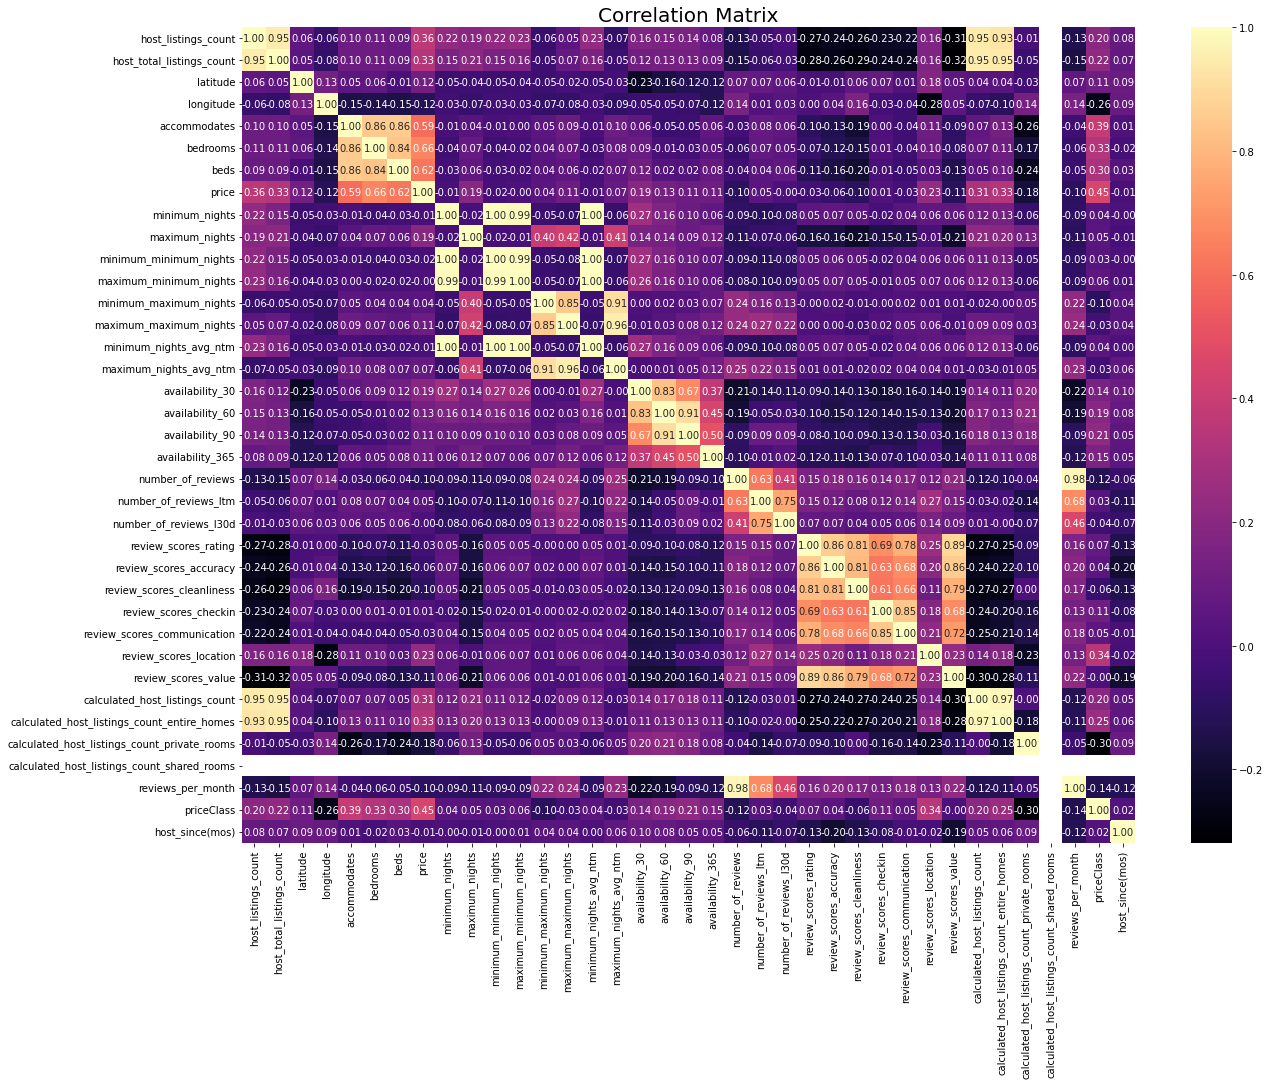

In [ ]:
f, ax = plt.subplots(figsize=[20, 15])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

When we look at the Correlation matrix above, we can understand that the columns "accomodates", "bedrooms", "beds", "prices" has highest correlation with the target value - priceClass.

In [ ]:
sorted(df1.corrwith(df1["priceClass"]),reverse = True)
#1.0  is correlation between priceClass and priceClass 
#0.45428376930751063 is correlation between priceClass and "accomodates"
#0.44542570356459205 is correlation between priceClass and "bedrooms" 
#0.4328322523733696 is correlation between priceClass and "price"
#0.34544529391532075 is correlation between priceClass and "beds" 


# 'accommodates' column is the max number of guest per property

[0.44548947939461747,
 0.3915541173307637,
 0.344920284821615,
 0.33457007905874525,
 0.3044327997919018,
 0.24899317440761015,
 0.21915468556882955,
 0.21367202845235775,
 0.1990326595675841,
 0.18773791935923642,
 0.15180180967126508,
 0.14396221185221772,
 0.11316413014319493,
 0.06857189842682979,
 nan,
 1.0,
 0.20053265671315132,
 0.11321164002949137,
 0.05503763914086557,
 0.053573004731528706,
 0.0469467306731267,
 0.0435216059719794,
 0.04294648259838965,
 0.04014457022695087,
 0.03452859960070269,
 0.031329312625480964,
 0.01829939057135834,
 -0.0010092789812761258,
 -0.031858629405764685,
 -0.03235005342579947,
 -0.04160498206944167,
 -0.059664332187237684,
 -0.10162720540565842,
 -0.11978308614797598,
 -0.1377798214006635,
 -0.2597023454342972,
 -0.3030608421252626]

In [ ]:
df1["accommodates"]

1      1.0
5      4.0
7      5.0
10     3.0
12     6.0
      ... 
715    4.0
716    2.0
718    4.0
720    2.0
721    2.0
Name: accommodates, Length: 290, dtype: float64

### Finding Column Types

    Before creating and training our model, need to drop the "priceClass" column that model is going to be estimate with our current dataset -d1-. \
    Also, we used "price" column to create priceClass. So we can drop this column from our current dataset as well, before 
    training our model. 

In [ ]:
y = df1["priceClass"]
df1 = df1.drop(["priceClass"], axis=1)

In [ ]:
df1.columns

Index(['source', 'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', '

In [ ]:
#z = df1["price"]
df1 = df1.drop(["price"], axis=1)

In [ ]:
df1.shape

(6631, 54)

In [ ]:
df1["neighbourhood_cleansed"].value_counts()

I Centro Storico              168
XII Monte Verde                29
XIII Aurelia                   24
II Parioli/Nomentano           21
VII San Giovanni/Cinecittà     17
V Prenestino/Centocelle        12
VIII Appia Antica               7
IX Eur                          5
XIV Monte Mario                 3
XI Arvalia/Portuense            3
X Ostia/Acilia                  1
Name: neighbourhood_cleansed, dtype: int64

We wanted to know the list for numerical columns, the categorical columns and the binary columns. \
We defined cardinality threshold as "16" because we observed that "neighbourhood_cleansed" column has 15 categories. \
and wanted to keep these categories to apply one-hot encoding into that column "neighbourhood_cleansed".

In [ ]:
num_cols = [col for col in df1.columns if df1[col].dtypes != "O"]  # List for Numerical columns : if the datatype of the column is not an "Object" - O
cat_cols = [col for col in df1.columns if df1[col].dtypes == "O"]  #List for Categorical columns: if the datatype of the column is an "Object" -0 
binary_cols = [col for col in cat_cols if 3 > df1[col].nunique() > 1] #Lists for binary columns
oneHot_cols = [col for col in cat_cols if 16 >= df1[col].nunique() > 2]  #List for one hot encoding columns 

In [ ]:
oneHot_cols

['host_response_time',
 'host_verifications',
 'neighbourhood',
 'neighbourhood_cleansed',
 'room_type',
 'bathrooms_text']

In [ ]:
df1["neighbourhood_cleansed"].value_counts()

I Centro Storico              168
XII Monte Verde                29
XIII Aurelia                   24
II Parioli/Nomentano           21
VII San Giovanni/Cinecittà     17
V Prenestino/Centocelle        12
VIII Appia Antica               7
IX Eur                          5
XIV Monte Mario                 3
XI Arvalia/Portuense            3
X Ostia/Acilia                  1
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
#binary columns
binary_cols 

['source', 'host_is_superhost', 'host_identity_verified', 'instant_bookable']

In [ ]:
df1["source"].value_counts()

city scrape        274
previous scrape     16
Name: source, dtype: int64

In [ ]:
#one hot encoding columns
oneHot_cols

['host_response_time',
 'host_verifications',
 'neighbourhood',
 'neighbourhood_cleansed',
 'room_type',
 'bathrooms_text']

In [ ]:
df1["room_type"].value_counts()

Entire home/apt    205
Private room        71
Hotel room          14
Name: room_type, dtype: int64

In [ ]:
joined_list = binary_cols + oneHot_cols
joined_list

['source',
 'host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'host_response_time',
 'host_verifications',
 'neighbourhood',
 'neighbourhood_cleansed',
 'room_type',
 'bathrooms_text']

In [ ]:
df1["source"].value_counts()

city scrape        274
previous scrape     16
Name: source, dtype: int64

The list for Categorical columns "cat_cols" includes both 
the list for binary columns "bin_cols" and list for one-hot-encoded columns "oneHot_cols". \
So we need to keep the list for binary columns "bin_cols" and list for one-hot-encoded columns "oneHot_cols" for our model.
Rest of the list for categorical columns should be deleted from our model. 
So we used difference method of the list. 
we keep the list of columns that we want to drop, into "del2_cat_columns"


In [ ]:
del2_cat_columns = list(set(cat_cols).difference(joined_list)) 
print(del2_cat_columns)  
#joined_list = binary_cols + oneHot_cols

['has_availability', 'property_type', 'host_response_rate', 'last_review', 'host_has_profile_pic', 'host_neighbourhood', 'host_acceptance_rate', 'host_location', 'first_review']


In [ ]:
len(del2_cat_columns) #returns the number of columns that we are gonna delete              

#######host_neighbourhood--------> durmali miydi???
#####bathrooms_text --------> durmali miydi??

9

In [ ]:
df1.shape

(6631, 54)

In [ ]:
df1 = df1.drop(del2_cat_columns, axis = 1) # We deleted unnecessary columns

In [ ]:
df1.shape

(6631, 45)

### Label Encoder

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
for col in binary_cols:
    label_encoder(df1, col)

In [ ]:
df1["source"].value_counts()

0    274
1     16
Name: source, dtype: int64

In [ ]:
df1["host_is_superhost"].value_counts()

0    168
1    122
Name: host_is_superhost, dtype: int64

### One - Hot Encoding

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
df1.shape

(6631, 45)

In [ ]:
df1["host_response_time"].value_counts() #why 4 different columns are not in our new dataste????

within an hour        215
within a few hours     57
within a day           17
a few days or more      1
Name: host_response_time, dtype: int64

In [ ]:
df1 = one_hot_encoder(df1, oneHot_cols, drop_first=True)

In [ ]:
df1.shape

(6631, 65)

In [ ]:
df1.columns

Index(['source', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',


In [ ]:
df1.dtypes

source                                         int32
host_is_superhost                              int32
host_listings_count                          float64
host_total_listings_count                    float64
host_has_profile_pic                           int32
                                              ...   
neighbourhood_cleansed_XIV Monte Mario         uint8
neighbourhood_cleansed_XV Cassia/Flaminia      uint8
room_type_Hotel room                           uint8
room_type_Private room                         uint8
room_type_Shared room                          uint8
Length: 65, dtype: object

In [ ]:
cat_cols = [col for col in df1.columns if df1[col].dtypes == "O"]

In [ ]:
cat_cols # We don't have any object column now 

[]

### Standardization

To stardardization, we consider only the numeric columns, that doesnt exists in the columns 
1-binary columns -binary_cols and 
2-one Hot encoded columns -oneHot_cols

In [ ]:
df0["minimum_nights"]

0        1
1        7
2        3
3        1
4        2
        ..
24777    2
24778    1
24779    1
24780    1
24781    1
Name: minimum_nights, Length: 24782, dtype: int64

In [ ]:
standard_columns = [col for col in num_cols if col not in binary_cols and col not in oneHot_cols]
df[standard_columns].dtypes 

host_listings_count                             float64
host_total_listings_count                       float64
latitude                                        float64
longitude                                       float64
accommodates                                    float64
bedrooms                                        float64
beds                                            float64
minimum_nights                                  float64
maximum_nights                                  float64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
minimum_maximum_nights                          float64
maximum_maximum_nights                          float64
minimum_nights_avg_ntm                          float64
maximum_nights_avg_ntm                          float64
availability_30                                 float64
availability_60                                 float64
availability_90                                 

In [ ]:
scaler = StandardScaler()
df1[standard_columns] = scaler.fit_transform(df1[standard_columns])

In [ ]:
df1["minimum_nights"]

1        0.456639
5        0.026804
7       -0.188114
10       0.026804
12       0.026804
           ...   
23912   -0.080655
24125   -0.188114
24327    0.241722
24401    0.134263
24406   -0.080655
Name: minimum_nights, Length: 6631, dtype: float64

### Saving our current dataset as a csv file. We are gonna use for our model.

In [ ]:
df.to_csv('df1.csv', index=False)

## Modelling

We splitted our dataset into train and test data. \
Train data includes 80 % of our dataset. \
Test data includes 20 % of our dataset.   test_size=0.20

In [ ]:
#Target value
y.value_counts()

1    182
0    108
Name: priceClass, dtype: int64

In [ ]:
# import Random Forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RandomizedSearchCV, validation_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.20, random_state=1) # what if we change random_state

In [ ]:
#Current dataset

df1.shape

(6631, 65)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((5304, 65), (1327, 65))

In [ ]:
# check data types in X_train

X_train.dtypes

source                                         int32
host_is_superhost                              int32
host_listings_count                          float64
host_total_listings_count                    float64
host_has_profile_pic                           int32
                                              ...   
neighbourhood_cleansed_XIV Monte Mario         uint8
neighbourhood_cleansed_XV Cassia/Flaminia      uint8
room_type_Hotel room                           uint8
room_type_Private room                         uint8
room_type_Shared room                          uint8
Length: 65, dtype: object

In [ ]:
X_train.head()

,source,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,...,neighbourhood_cleansed_VIII Appia Antica,neighbourhood_cleansed_X Ostia/Acilia,neighbourhood_cleansed_XI Arvalia/Portuense,neighbourhood_cleansed_XII Monte Verde,neighbourhood_cleansed_XIII Aurelia,neighbourhood_cleansed_XIV Monte Mario,neighbourhood_cleansed_XV Cassia/Flaminia,room_type_Hotel room,room_type_Private room,room_type_Shared room
15719,0,1,-0.291841,-0.320101,1,1,0.575809,-0.833353,-0.467267,-0.614691,...,0,0,0,0,0,0,0,0,0,0
8914,0,0,-0.250382,-0.286942,1,1,-1.338627,-0.921278,-0.919067,-0.614691,...,0,0,0,1,0,0,0,0,1,0
14001,0,1,-0.271112,-0.286942,1,1,0.539517,-0.218108,-0.015467,-0.614691,...,0,0,0,0,0,0,0,0,0,0
7396,0,0,-0.208922,-0.253782,1,1,-0.555846,0.487796,-0.919067,-0.614691,...,0,0,0,0,0,0,0,0,1,0
13136,0,0,-0.208922,-0.253782,1,1,0.339518,0.445629,-0.919067,-0.614691,...,0,0,0,0,0,0,0,1,0,0


##### random_state =1 

1- We trained the model with training data and then also we tested the model with same training dataset.

In [ ]:
# instantiate the classifier 
rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split= 2, max_features= 5, max_depth=8)
#fit the model
rf_model.fit(X_train, y_train)
cv_results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_accuracy'].mean())

0.906596079365172
0.864044242323871
0.8261652986533063


2- We trained the model with training data 80% and then we tested the model with test data -20%-

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split= 2, max_features= 5, max_depth=8)
rf_model.fit(X_train, y_train)
cv_results = cross_validate(rf_model, X_test, y_test, cv=10, scoring=["accuracy", "f1", "roc_auc"]) #BURASI FARKLI!!! yukardan
print("Test ROC AUC is ", cv_results['test_roc_auc'].mean())
print("F1 score is ", cv_results['test_f1'].mean())
print("Test accuracy is ", cv_results['test_accuracy'].mean())

Test ROC AUC is  0.9028866538698559
F1 score is  0.8580389276340694
Test accuracy is  0.8221861471861471


When we compare two results above, we can see that there is no cruical difference between them.  

For example;   

when we use only train dataset, both for training the model and testing the model, \
it gives accuracy as 0.83 and F1 score as 0.86.

Also when we train our model with train dataset and then we use test dataset to testing model,  \
it gives accuracy as 0.82 and F1 score as 0.86.

##### random_state =40  

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.20, random_state=40) 

NameError: ignored

In [ ]:
# instantiate the classifier 
rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split= 2, max_features= 5, max_depth=8)
#fit the model
rf_model.fit(X_train, y_train)
cv_results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print("Test ROC AUC is ", cv_results['test_roc_auc'].mean())
print("F1 score is ", cv_results['test_f1'].mean())
print("Test accuracy is ", cv_results['test_accuracy'].mean())

Test ROC AUC is  0.9063848877608794
F1 score is  0.8647033263357603
Test accuracy is  0.8272941761716947


**SVM** **MODEL**

1- We trained the model with training data and then also we tested the model with same training dataset.

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

cv_results = cross_validate(svm_model, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_accuracy'].mean())

0.8724074074074075
0.8561173752036966
0.8103260869565216


2- We trained the model with training data 80% and then we tested the model with test data -20%-

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

cv_results = cross_validate(svm_model, X_test, y_test, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print("Test ROC AUC is ", cv_results['test_roc_auc'].mean())
print("F1 score is ", cv_results['test_f1'].mean())
print("Test accuracy is ", cv_results['test_accuracy'].mean())

Test ROC AUC is  0.6847222222222222
F1 score is  0.5545238095238095
Test accuracy is  0.56


Lower scores for the testing data means that the model is not performing well.

## Visualization

### Histogram

The probability and price histogram tell us as that the price variable is right skewed.We can also see that the most of the prices are between 10 to 105.

In [ ]:
#bnb.hist(column='price', bins= 50, grid=False, figsize=(10,8), color='plum', zorder= 10, rwidth= 0.9)

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(df['price'], density=True, bins= 50 , color = 'plum', ec= 'white') 
plt.ylabel('Probability')
plt.xlabel('Price');

### Box plot

Box plot are useful as they provide a visual summary of the data to quickly identify mean values, the dispersion of the data set, and signs of skewness. It is used to identify the outliers to the original data.
'Latitude' shows normal distribution,
'longitude', 'reviews_per_month' and 'number_of_reviews' show positive skewness,
'accommodates' and 'availability_365' indicate negative skewness and the other features show that there are many outliers in the dataset.

In [ ]:
plt.style.use('fivethirtyeight')

numerical_cols = ['latitude','longitude','accommodates','bedrooms','price','minimum_nights','maximum_nights',
                  'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']


categorical_cols = ['room_type','instant_bookable']


plt.figure(figsize=(15,15))
 
i = 1
for col in numerical_cols:
    plt.subplot(3,4,i) 
    plt.boxplot(bnb[col])
    plt.xlabel(col)
    i +=1
plt.show()

Applying some standardization methods, in order to remove the outliers: 

## Scatter plot

Here, we scatter plot of each variable in dataset with each other by grouping them by 'price_class' which we just created before. We do this to identify if there is a pair of features that can clearly separate two classes.
As seen graphs of price vs all other features show a good division between two classes. Not many plots show clear distinction between two classes.

In [ ]:
plt.style.use('default')

M = len(numerical_cols)
y_unq = df1.groupby('priceClass')


fig, ax = plt.subplots(M,M,figsize=(20,20))
i = 0
j= 0

for col1 in num_cols:
    for col2 in num_cols:
        for c in range(len(y_unq)):
            # select indices belonging to class c:
            class_mask = df1['priceClass']==c
            ax[i,j].scatter(df1.loc[class_mask,col2], df1.loc[class_mask,col1],alpha=0.3)

        if j == 0:
            ax[i,j].set_ylabel(col1)
        else :
            ax[i,j].set_yticks([])
            
        if i == M-1:
            ax[i,j].set_xlabel(col2)
        else:
            ax[i,j].set_xticks([])
            
        if i == M-1 and  j == M-1:
            ax[i,j].legend(range(len(y_unq)))
            
        j += 1
    j = 0
    i += 1
    
plt.show()

### High percentage table

In [ ]:
Filtering by 'price_class' according to 'room_type' feature is obtained that both Hotel rooms and Entire Home/apt have approximately the same high_price_percentage, which is more than 50% and about just 23% in private rooms.
Likewise, when filtered by 'neighbourhood_cleansed', it is observed that 'I Centro Storico' has 67% of high price accommodation and less than 9% in Prenestino/Centocelle.
In general half of the total accommodation is high priced. Lastly from the categorical variables dummy variables are obtained.

In [ ]:
bnb_gb = bnb.groupby('room_type')['price_class'].agg(['sum','count'])

high_price_percentage = np.round_(bnb_gb['sum'] / bnb_gb['count']*100,2)
high_price_percentage = high_price_percentage.reset_index()
high_price_percentage.columns = ['room_type','high_price_percentage']

high_price_percentage

In [ ]:
bnb_gb = bnb.groupby('neighbourhood_cleansed')['price_class'].agg(['sum','count'])

high_price_percentage = np.round_(bnb_gb['sum'] / bnb_gb['count']*100,2)
high_price_percentage = high_price_percentage.reset_index()
high_price_percentage.columns = ['neighbourhood_cleansed','high_price_percentage']

high_price_percentage.sort_values(by = 'high_price_percentage', ascending=False)

# **Part 2: Prediction Challenge**

## Results  ------- write!

To create our target value column "priceClass",

1- when we use price.mean(), our result for Random Forest was:

Test ROC AUC is  0.9062613560545506
F1 score is  0.6827303661893687
Test accuracy is  0.8395078605604922

2- when we use price.median(), our result for Random Forest was:
    
Test ROC AUC is  0.9028866538698559
F1 score is  0.8580389276340694
Test accuracy is  0.8221861471861471

So using price.median(), improved our F1 score. 

Using 14(?)columns that we choose in Lorenzo's notebook, 
Our model has that accuracy and f1 score.

Using 24(?) columns that we choose in Nasim Notebook, Our model has that accuracy and f1 score.

And checking all columns, using all columns as possible as we can, we have 
.....

### problems we faced during our project
And which methods could be apply in the future to be able to improve them

For example we havent applied filling empty features.
If we have time at the end we can add